# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = "./Data" # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [2]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [3]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [4]:
from IPython.core.display import HTML
import pandas as pd
import numpy as np
%pylab inline
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
HTML(filename=DATA_FOLDER+'/titanic.html')

Populating the interactive namespace from numpy and matplotlib


Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### Part 1

###### Reading of titanic.xls
The `read_excel()` function is used to load the data contained in titanic.xls into a DataFrame called titanic.
The header keyword is set to 0 so that the first line of the file defines the columns of the DataFrame. The first rows of the loaded DataFrame are then printed.

In [5]:
titanic = pd.read_excel(DATA_FOLDER+'/titanic.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The columns of titanic are displayed below. Some of them can be considered as `Categorical`.

In [6]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

The attributes `pclass`, `survived`, `sex` and `embarked` will be considered as categoricals for the rest of the study. They are transformed as suin the piece of code below:

In [7]:
to_categoricals = ['pclass','survived','sex','embarked']
#titanic[to_categoricals] = titanic[to_categoricals].astype('category') #-> does not work on my computer idk why
for s in to_categoricals:
    titanic[s] = titanic[s].astype('category')

We now investigate the type and the value range of each attribute.

In [8]:
print('Total number of passengers:', titanic.shape[0], '\n')

print('pclass categories:', titanic.pclass.cat.categories)
print('Number of NaN values:', sum(titanic.pclass.isnull()), "\n")

print('survived categories:', titanic.survived.cat.categories)
print('Number of NaN values:', sum(titanic.survived.isnull()), "\n")

print('name attribute:')
print('dtype:', titanic.name.dtype)
print('Number of NaN values:', sum(titanic.name.isnull()), "\n")

print('sex categories:', titanic.sex.cat.categories)
print('Number of NaN values:', sum(titanic.sex.isnull()), "\n")

print('age attribute:')
print('dtype:', titanic.age.dtype)
print('Number of different values:', len(titanic.age.unique()))
print('Range from', titanic.age.min(), 'to', titanic.age.max())
print('Number of NaN values:', sum(titanic.age.isnull()), "\n")

print('sibsp attribute:')
print('dtype:', titanic.sibsp.dtype)
print('Possible values: ', titanic.sibsp.unique())
print('Range from', titanic.sibsp.min(), 'to', titanic.sibsp.max())
print('Number of NaN values:', sum(titanic.sibsp.isnull()), "\n")

print('parch attribute:')
print('dtype:', titanic.parch.dtype)
print('Possible values: ', titanic.parch.unique())
print('Range from', titanic.parch.min(), 'to', titanic.parch.max())
print('Number of NaN values:', sum(titanic.parch.isnull()), "\n")

print('ticket attribute:')
print('dtype:', titanic.ticket.dtype)
print('Number of different values:', len(titanic.ticket.unique()))
print('Number of NaN values:', sum(titanic.ticket.isnull()), "\n")

print('fare attribute:')
print('dtype:', titanic.fare.dtype)
print('Number of different values:', len(titanic.fare.unique()))
print('Range from', titanic.fare.min(), 'to', titanic.fare.max())
print('Number of NaN values:', sum(titanic.fare.isnull()), "\n")

print('cabin attribute:')
print('dtype:', titanic.cabin.dtype)
print('Number of different values:', len(titanic.cabin.unique()))
print('Number of NaN values:', sum(titanic.cabin.isnull()), "\n")

print('embarked categories:', titanic.embarked.cat.categories)
print('Number of NaN values:', sum(titanic.embarked.isnull()), "\n")

print('boat attribute:')
print('dtype:', titanic.boat.dtype)
print('Possible values: ', titanic.boat.unique())
print('Number of NaN values:', sum(titanic.boat.isnull()), "\n")

print('body attribute:')
print('dtype:', titanic.body.dtype)
print('Number of different values:', len(titanic.body.unique()))
print('Range from', titanic.body.min(), 'to', titanic.body.max())
print('Number of NaN values:', sum(titanic.body.isnull()), "\n")

print('home.dest attribute:')
print('dtype:', titanic['home.dest'].dtype)
print('Number of different values:', len(titanic['home.dest'].unique()))
print('Number of NaN values:', sum(titanic['home.dest'].isnull()), "\n")


    

Total number of passengers: 1309 

pclass categories: Int64Index([1, 2, 3], dtype='int64')
Number of NaN values: 0 

survived categories: Int64Index([0, 1], dtype='int64')
Number of NaN values: 0 

name attribute:
dtype: object
Number of NaN values: 0 

sex categories: Index(['female', 'male'], dtype='object')
Number of NaN values: 0 

age attribute:
dtype: float64
Number of different values: 99
Range from 0.1667 to 80.0
Number of NaN values: 263 

sibsp attribute:
dtype: int64
Possible values:  [0 1 2 3 4 5 8]
Range from 0 to 8
Number of NaN values: 0 

parch attribute:
dtype: int64
Possible values:  [0 2 1 4 3 5 6 9]
Range from 0 to 9
Number of NaN values: 0 

ticket attribute:
dtype: object
Number of different values: 939
Number of NaN values: 0 

fare attribute:
dtype: float64
Number of different values: 282
Range from 0.0 to 512.3292
Number of NaN values: 1 

cabin attribute:
dtype: object
Number of different values: 187
Number of NaN values: 1014 

embarked categories: Index(['C'

### Part 2

###### `pclass`, `embarked` and `sex` histograms
Histograms of the `pclass`, `embarked` and `sex` atttributes are plotted below. Note that the NaN values are ignored here. It is quite a reasonable assumption since the number of NaN values is 0 for the `pclass` and `sex` attributes and is only 2 for the `embarked` attribute.

In [9]:
tester = pd.Series([1,2,3])
tester
tester.index = [3, 4, 1]

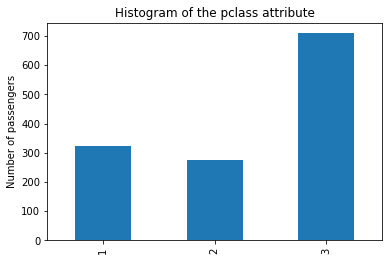

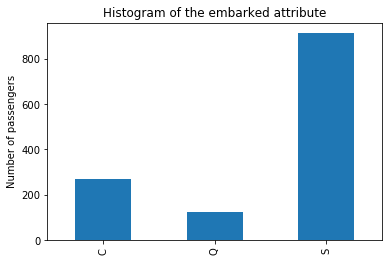

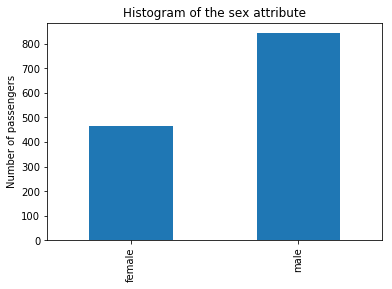

In [10]:
import matplotlib.pyplot as plt
cat_to_plot = ['pclass','embarked','sex']

for elem in cat_to_plot:  
    plt.figure()
    histo = titanic[elem].value_counts().sort_index().plot(kind='bar',\
                                                           title = 'Histogram of the ' + elem + ' attribute')
    histo.set_ylabel('Number of passengers')

###### `Age` histogram
In this section an histogram of the passengers age is produced. The histogram's bars represent the age by decade. Note that 263 NaN values out of 1309 passengers in total are found in the `age` column of the titanic database. The assumption is made that the NaN values of this attributes follow the same distribution as the valid data. Therefore the plotting of the NaN values is omitted in this section.

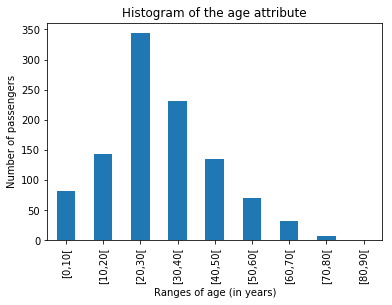

In [11]:
age_values = []
indexes = []
max_age = titanic['age'].max()
for i in range(int(max_age)//10+1):
    tmp_series = titanic['age'][titanic['age'].between(i*10, (i+1)*10)]
    tmp_series = tmp_series[[x for x in tmp_series.index if tmp_series[x] != (i+1)*10]]
    age_values += [tmp_series.shape[0]]
    indexes += ['[' + str(i*10) + ',' + str((i+1)*10) + '[']

age_values = pd.Series(age_values)
age_values.index = indexes

histo = age_values.plot(kind='bar', title = 'Histogram of the age attribute')

histo.set_ylabel('Number of passengers')
histo.set_xlabel('Ranges of age (in years)')

### Part3

By going through the possible values taken by the `cabin` attribute we can remark that the different floors of the Titanic are the followings: {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [12]:
level_values = [x[0] for x in titanic[titanic['cabin'].notnull()]['cabin'].astype(str)]
level_values = np.unique(level_values)
level_values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], 
      dtype='<U1')

###### Pie chart for cabin levels
A pie chart for cabin level is produced below according to the different floors stated at the beginning of Part 3.

A    22
B    65
C    94
D    46
E    41
F    21
G     5
T     1
dtype: int64

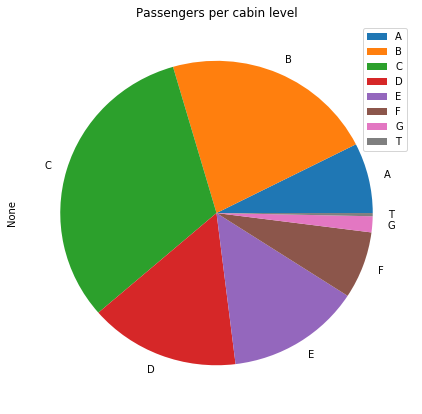

In [13]:
level_count = []
for level in level_values:
    current_level_serie = titanic['cabin'].iloc[[x for x in range(titanic.shape[0]) \
                                             if titanic['cabin'].astype(str).iloc[x][0] == level]]
    level_count += [current_level_serie.shape[0]]
level_count = pd.Series(level_count)
level_count.index = level_values

plt.figure(figsize=[7,7])
ax = level_count.plot(kind='pie', legend = True, title="Passengers per cabin level")
level_count

It is interesting to remark that the total number of passengers for whom a cabin has been attributed is very small compared to the total number of passengers in the Titanic.

In [14]:
print('Number of NaN values for the cabin attribute:', titanic[titanic['cabin'].isnull()].shape[0])
print('Total number of passengers in the Titanic:', titanic.shape[0])

Number of NaN values for the cabin attribute: 1014
Total number of passengers in the Titanic: 1309


It is thus interesting to plot the following more meaningful pie chart.

A        22
B        65
C        94
D        46
E        41
F        21
G         5
T         1
NaN    1014
dtype: int64

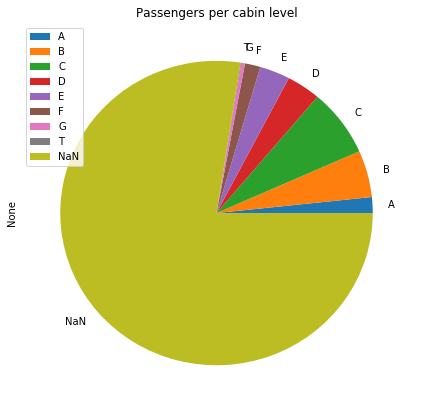

In [15]:
level_count['NaN'] = titanic[titanic['cabin'].isnull()].shape[0]

plt.figure(figsize=[7,7])
ax = level_count.plot(kind='pie', legend = True, title="Passengers per cabin level")
level_count

### Part 4


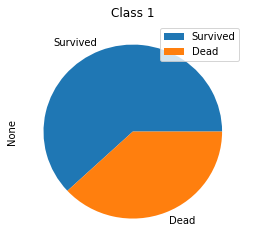

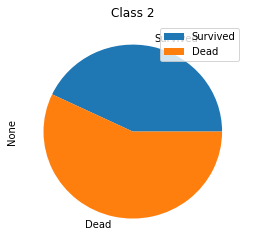

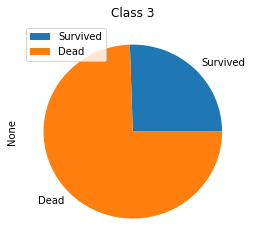

In [16]:
for i in range(3):
    class_df = titanic[titanic['pclass'] == i+1]
    class_pop = class_df.shape[0]
    class_survivors = class_df[class_df['survived'] == 1].shape[0]
    survivor_series = pd.Series([class_survivors, class_pop-class_survivors])
    survivor_series.index = ['Survived', 'Dead']
    
    plt.figure(figsize=[4,4])
    survivor_series.plot(kind='pie', legend = True, title="Class " + str(i+1))


### Part 5

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


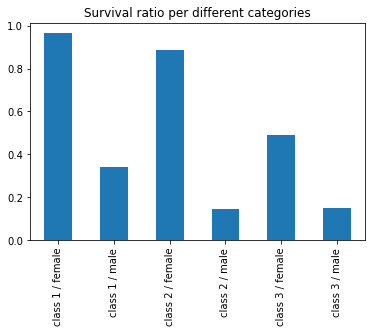

In [17]:
series_to_plot = pd.Series([])
for a in titanic.pclass.cat.categories:
    for b in titanic.sex.cat.categories:
        first_filter = []
        second_filter = []
        first_filter = titanic[titanic['pclass'] == a]
        second_filter = first_filter[titanic['sex'] == b]
        survived = second_filter[titanic['survived'] == 1].shape[0]
        total = second_filter.shape[0]
        series_to_plot['class ' + str(a) + " / " + b] = survived / total
        
series_to_plot.plot(kind='bar', title = 'Survival ratio per different categories')

### Part 6

First, we find where median of the age serie.
To do so, we use the nsmallest method of panda series, and find the max value of the result.

In [35]:
age_column = titanic['age'].dropna()
youngs = age_column.nsmallest(int(age_column.size/2))
print('median = ',max(youngs))
olds = age_column.drop(youngs.index)
print('number of persons of 28 years old in the oldest persons: ',len(olds[olds == 28.0]))
print('number of persons of 28 years old in the youngest persons: ',len(youngs[youngs == 28.0]))
print(len(age_column))

median =  28.0
number of persons of 28 years old in the oldest persons:  13
number of persons of 28 years old in the youngest persons:  19
1046


                    young       old
female, 1 class  0.951220  0.967391
female, 2 class  0.910714  0.872340
female, 3 class  0.513761  0.372093
male, 1 class    0.531250  0.302521
male, 2 class    0.216216  0.083333
male, 3 class    0.183036  0.144000

 Does my final Dataframe has unique index ? 
 True


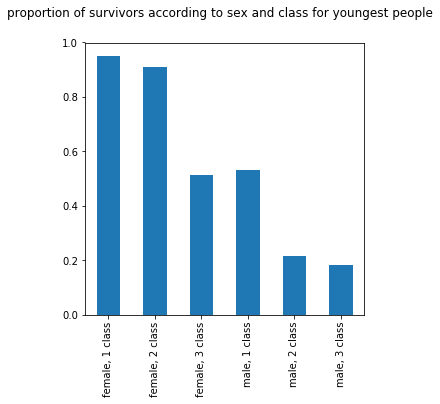

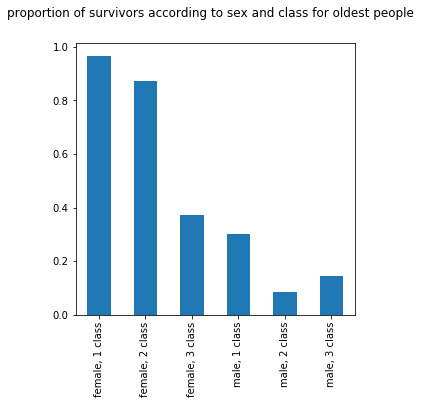

In [52]:
sex_categories = titanic['sex'].unique()
pclass_categories = titanic['pclass'].unique()

histo_array1 = []
histo_indexes1 = []

for sex in sex_categories:
    for pclass in pclass_categories:
        histo_indexes1.append(sex + ", " + pclass.astype(str) + " class")
        histo_array1.append((((titanic['sex'] == sex) &  (titanic['pclass'] == pclass) & 
                             (titanic['age'] <= 28) & (titanic['survived'] == 1)).value_counts('True')[True])/ 
                      ((titanic['sex'] == sex) &  (titanic['age'] <= 28) &
                       (titanic['pclass'] == pclass)).value_counts('True')[True])
        
histo_array2 = []
histo_indexes2 = []

for sex in sex_categories:
    for pclass in pclass_categories:
        histo_indexes2.append(sex + ", " + pclass.astype(str) + " class")
        histo_array2.append((((titanic['sex'] == sex) &  (titanic['pclass'] == pclass) & 
                             (titanic['age'] > 28) & (titanic['survived'] == 1)).value_counts('True')[True])/ 
                      ((titanic['sex'] == sex) &  (titanic['age'] > 28) &
                       (titanic['pclass'] == pclass)).value_counts('True')[True])


serie_histo1 = pd.Series(histo_array1, index=histo_indexes1, name='young' )
serie_histo2 = pd.Series(histo_array2, index=histo_indexes2, name='old' )
final_df = pd.concat([serie_histo1,serie_histo2],axis=1)
print(final_df)
print('\n Does my final Dataframe has unique index ? \n',final_df.index.is_unique)

plt.figure(figsize=[5,5]).suptitle('proportion of survivors according to sex and class for youngest people')
serie_histo1.plot(kind='bar')

plt.figure(figsize=[5,5]).suptitle('proportion of survivors according to sex and class for oldest people')
serie_histo2.plot(kind='bar')